In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


Visualisation de la répartition spatiale des compressions au sein de la ME

In [78]:
path_to_csv = '/Users/etiennedufayet/Desktop/STAGE_3A/Compression_detection_zurich/dataset_zurich_metrics_6.csv'

df = pd.read_csv(path_to_csv)

compression_dict = {}

for i in range(1,np.max(df['patient_number']+1)):
    patient_dataset = df[df['patient_number'] == i]
    nb_slices = np.max(patient_dataset['slice_number'])

    patient_compression = patient_dataset[patient_dataset['is_compressed'] == 1]
    
    for slice in patient_compression['slice_number']:
        position = np.round(slice/nb_slices, 2)

        if position in compression_dict:
            compression_dict[position] += 1
        else:
            compression_dict[position] = 1

compression_dict = {k: compression_dict[k] for k in sorted(compression_dict)}

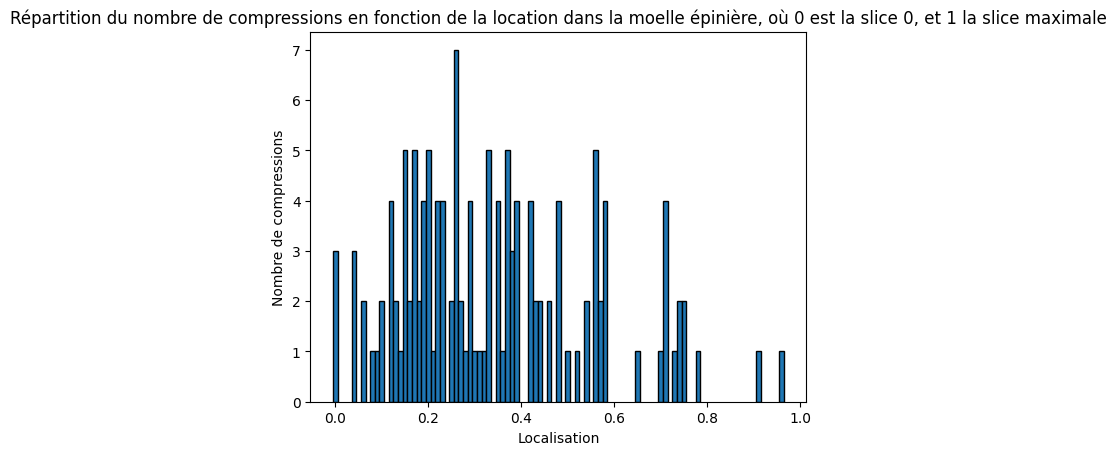

In [32]:
compressions = list(compression_dict.values())
location = list(compression_dict.keys())

# Épaisseur des barres
bar_width = 0.01

# Créer le diagramme en barres avec l'épaisseur spécifiée
plt.bar(location,compressions, width=bar_width, edgecolor='black')

# Ajouter des étiquettes et un titre
plt.xlabel('Catégories')

# Ajouter des étiquettes et un titre
plt.xlabel('Localisation')
plt.ylabel('Nombre de compressions')
plt.title('Répartition du nombre de compressions en fonction de la location dans la moelle épinière, où 0 est la slice 0 et 1 la slice maximale')

# Afficher le diagramme en barres
plt.show()

In [63]:
index = np.linspace(np.min(compression_ratio_dataset['CompressionRatio']),  - np.max(compression_ratio_dataset['CompressionRatio']), 30)
stack_compression = pd.DataFrame({'CompressionRatio': [], 'is_compressed': []})

for i in range(len(index)-1):
    filtered_df = compression_ratio_dataset[compression_ratio_dataset['CompressionRatio']>=index[i] & compression_ratio_dataset['CompressionRatio']<index[i+1]]
    nb_comp = np.sum(filtered_df['is_compressed'])
    new_line = {'CompressionRatio':index[i], 'is_compressed': nb_comp}

    stack_compression = stack_compression.append(new_line, ignore_index=True)

print(stack_compression)

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [64]:
compression_ratio_dataset = df[['CompressionRatio', 'is_compressed']]
compression_ratio_dataset = compression_ratio_dataset.sort_values('CompressionRatio')
compression_ratio_dataset

,CompressionRatio,is_compressed
660,0.278326,1
1018,0.286731,1
1633,0.290063,0
1678,0.290726,0
1676,0.293015,0
...,...,...
1531,0.802859,0
882,0.805441,0
1310,0.816605,0
883,0.837271,0


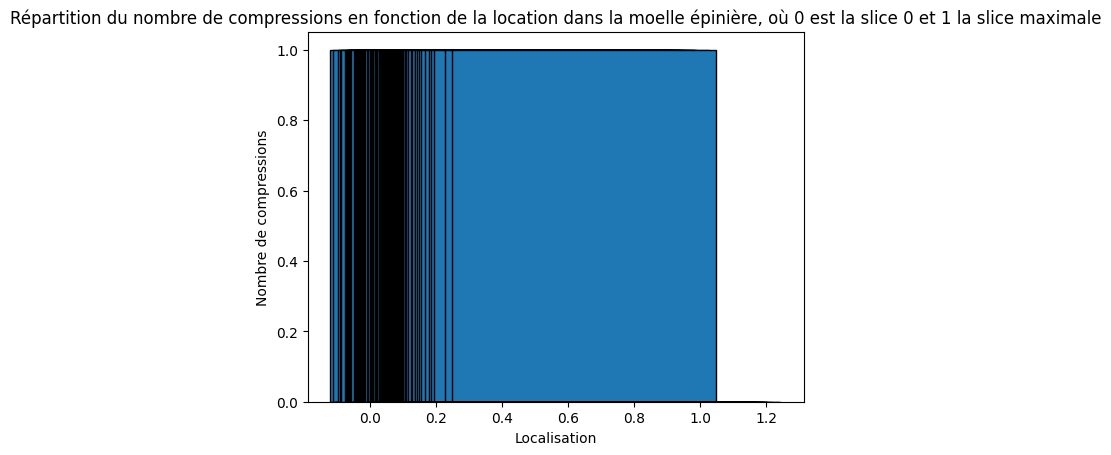

In [66]:
# Épaisseur des barres
#bar_width = 0.01

# Créer le diagramme en barres avec l'épaisseur spécifiée
plt.bar(compression_ratio_dataset['CompressionRatio'],compression_ratio_dataset['is_compressed'], edgecolor='black')

# Ajouter des étiquettes et un titre
plt.xlabel('Catégories')

# Ajouter des étiquettes et un titre
plt.xlabel('Localisation')
plt.ylabel('Nombre de compressions')
plt.title('Répartition du nombre de compressions en fonction de la location dans la moelle épinière, où 0 est la slice 0 et 1 la slice maximale')

# Afficher le diagramme en barres
plt.show()

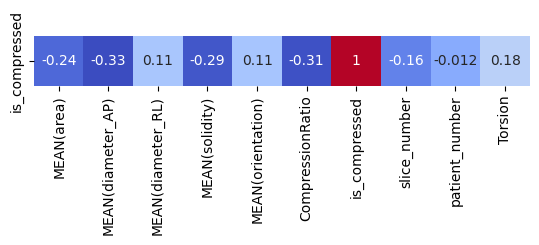

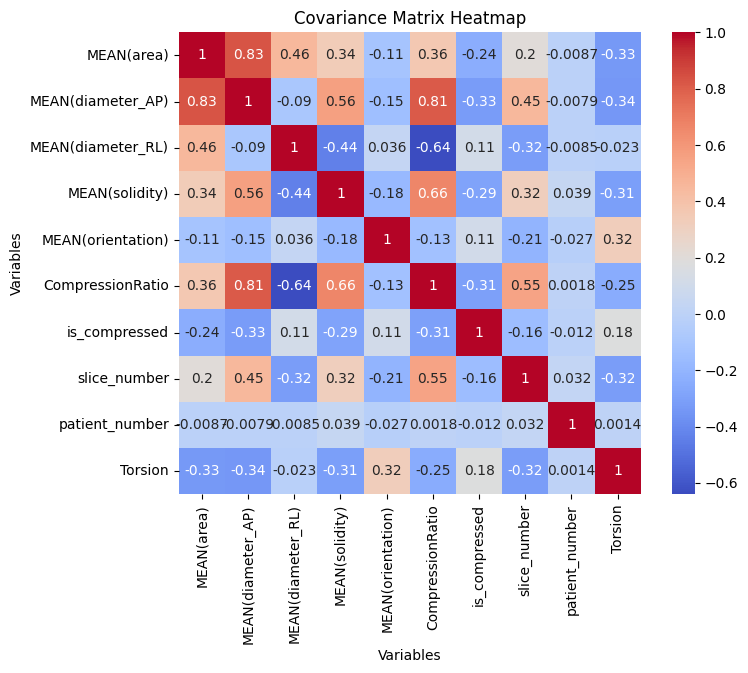

In [83]:
from sklearn.preprocessing import StandardScaler


path_to_csv = '/Users/etiennedufayet/Desktop/STAGE_3A/Compression_detection_zurich/dataset_zurich_metrics_6.csv'

df = pd.read_csv(path_to_csv)


# data cleaning 
df = df.drop(columns=['DistancePMJ', 'VertLevel'])

df = df.dropna(axis=0)

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

cov_matrix = scaled_df.cov()

row_to_keep = 'is_compressed'
row = cov_matrix.loc[row_to_keep]

df_row = pd.DataFrame(row).T
sns.heatmap(df_row, annot=True, cmap='coolwarm', square=True, cbar=False)


# Plot the covariance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', square=True)

# Set the plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the heatmap
plt.show()